# 1. 데이터 탐색: 단변량

In [1]:
import pandas as pd
data=pd.read_csv('Ex_CEOSalary.csv', encoding='utf-8')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
salary      209 non-null int64
sales       209 non-null float64
roe         209 non-null float64
industry    209 non-null int64
dtypes: float64(2), int64(2)
memory usage: 6.6 KB


In [3]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


## 1-1. 범주형 자료의 탐색

In [4]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [5]:
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

<AxesSubplot:ylabel='industry'>

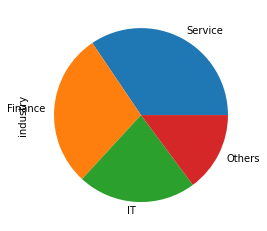

In [6]:
# 파이 차트
%matplotlib inline
data['industry'].value_counts().plot(kind="pie")

<AxesSubplot:>

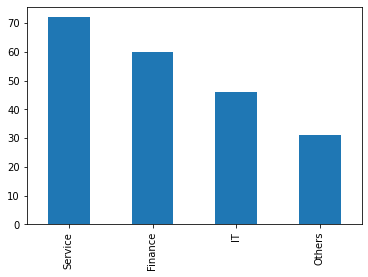

In [7]:
# bar 차트
data['industry'].value_counts().plot(kind="bar")

## 1-2. 연속형 자료의 탐색

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.7+ KB


In [9]:
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [3]:
## 왜도
# 2보다 크면 우측꼬리분포로 왼쪽에 자료가 많음
# 2보다 작으면 왼쪽꼬리분포로 오른쪽에 자료가 많음
data.skew()

salary      6.904577
sales       5.035336
roe         1.572126
industry    0.221505
dtype: float64

In [4]:
## 첨도
# + 일수록 중심에 자료가 몰려있고 - 일수록 가장자리에 자료가 많음
# 0이면 정규분포
data.kurtosis()

salary      58.971229
sales       33.115193
roe          3.797366
industry    -1.289426
dtype: float64

### pandas 제공 기술통계 함수 

- count:  NA 값을 제외한 값의 수를 반환 
- describe:  시리즈 혹은 데이터프레임의 각 열에 대한 기술 통계 
- min, max: 최소, 최대값 
- argmin, argmax:  최소, 최대값을 갖고 있는 색인 위치 반환 
- idxmin, idxmax:  최소 최대값 갖고 있는 색인의 값 반환 
- quantile:  0부터 1까지의 분위수 계산 
- sum: 합 
- mean: 평균 
- median: 중위값 
- mad: 평균값에서 절대 평균편차 
- var: 표본 분산 
- std: 표본 정규분산 
- skew: 표본 비대칭도 
- kurt: 표본 첨도 
- cumsum: 누적 합 
- cummin, cummax: 누적 최소값, 누적 최대값 
- cumprod: 누적 곱 
- diff: 1차 산술차 (시계열 데이터 사용시 유용) 
- pct_change: 퍼센트 변화율 계산 
- corr: 데이터프레임의 모든 변수 간 상관관계 계산하여 반환
- cov: 데이터프레임의 모든 변수 간 공분산을 계산하여 반환

In [21]:
data['salary'].count()
data['salary'].idxmax()

173

In [29]:
print(data[132:133])
print(data[173:174])

     salary  sales        roe  industry
132     223  181.5  22.700001         3
     salary        sales   roe  industry
173   14822  2159.199951  19.4         3


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

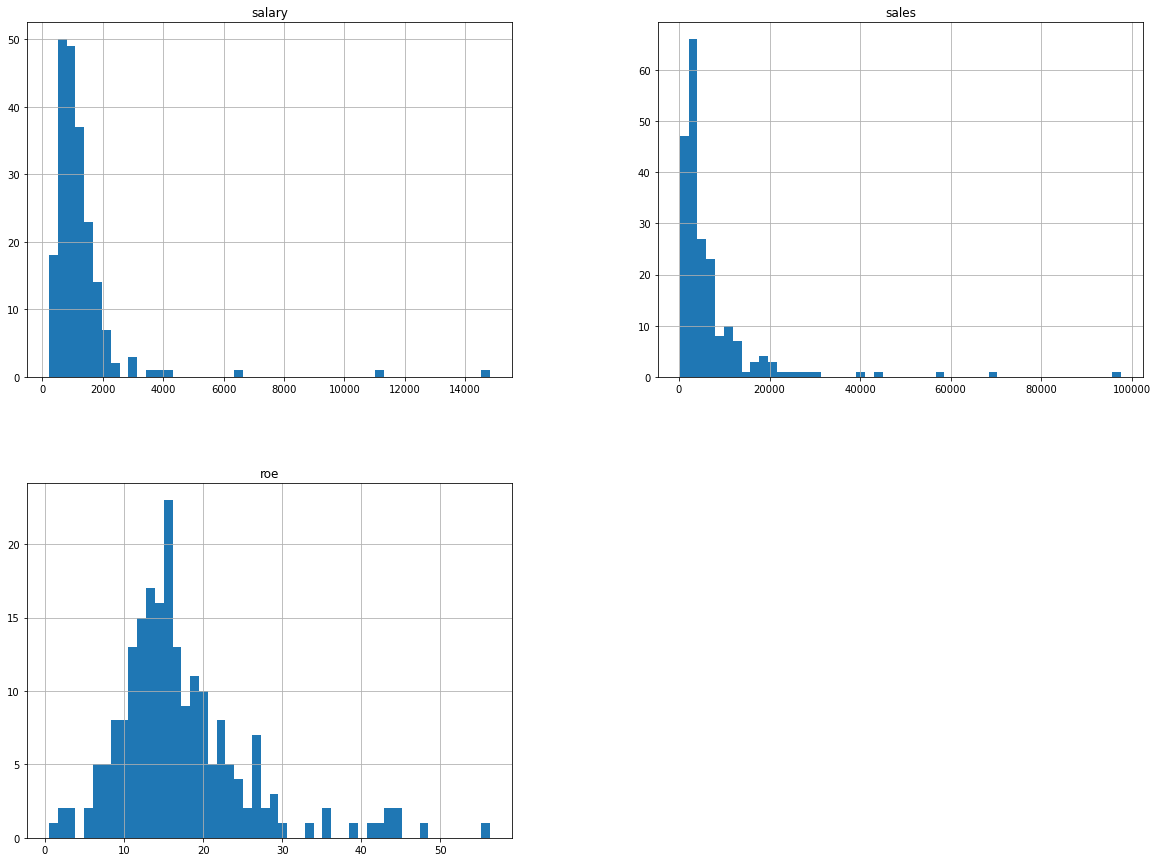

In [12]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

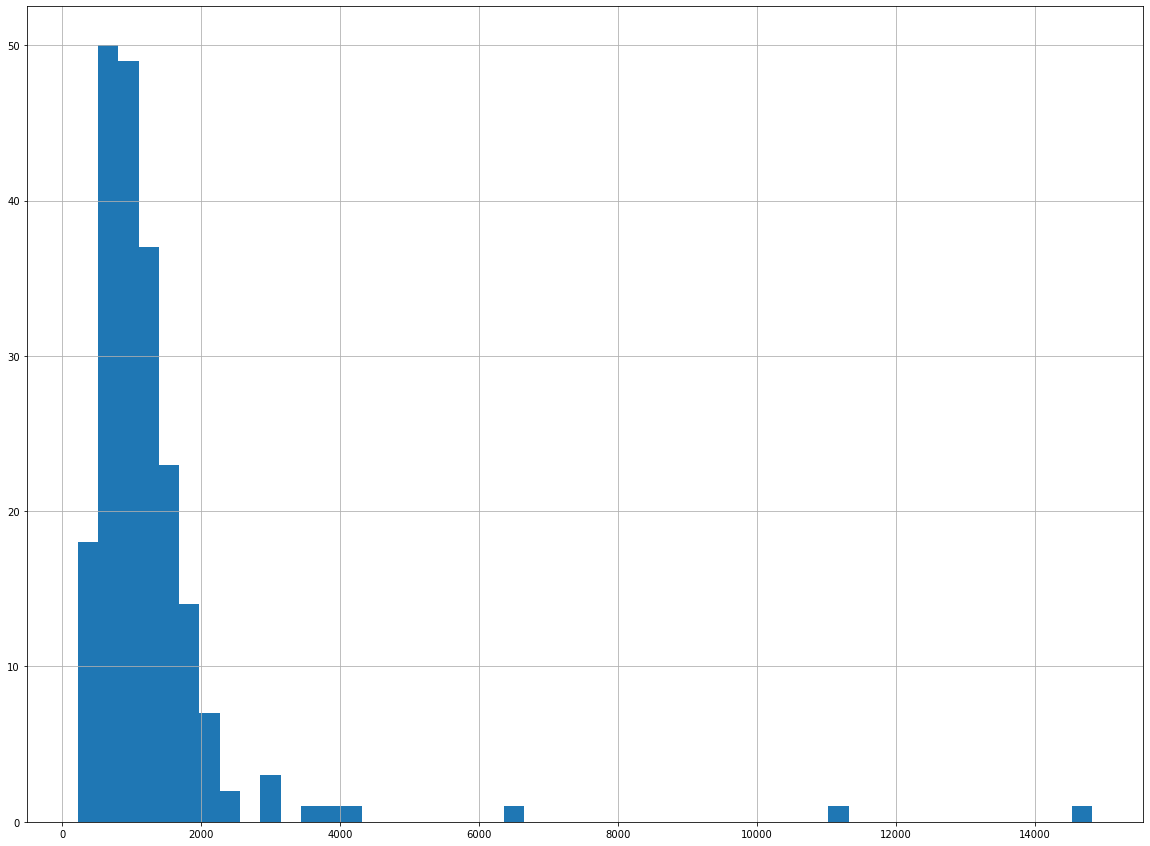

In [13]:
data['salary'].hist(bins=50, figsize=(20,15))

<AxesSubplot:>

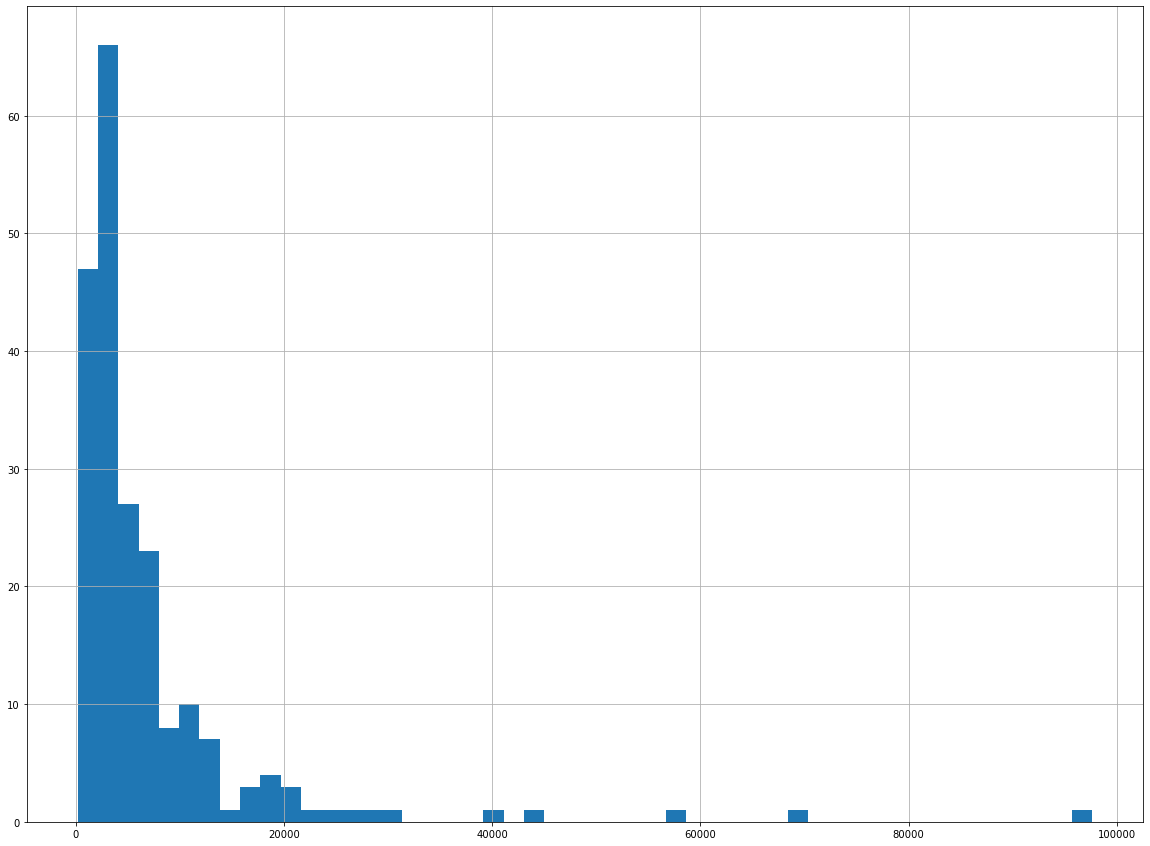

In [14]:
data['sales'].hist(bins=50, figsize=(20,15))

# 2. 데이터 탐색: 이변량

In [30]:
data.corr()

,salary,sales,roe,industry
salary,1.000000,0.119869,0.114842,-0.015725
sales,0.119869,1.000000,-0.055386,-0.100284
roe,0.114842,-0.055386,1.000000,-0.011833
industry,-0.015725,-0.100284,-0.011833,1.000000


In [16]:
data.corr(method="pearson")

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [17]:
data.corr(method="spearman")

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [18]:
data.corr(method="kendall")

,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


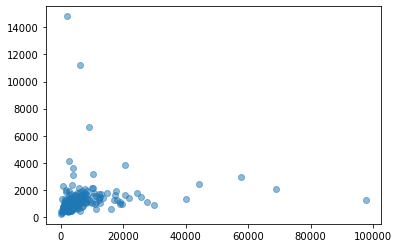

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'], alpha=0.5)
plt.show()

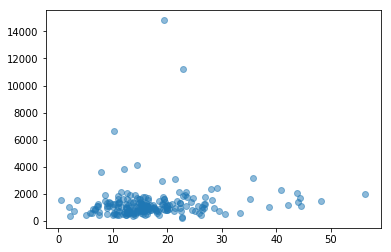

In [37]:
plt.scatter(data['roe'], data['salary'], alpha=0.5)
plt.show()

In [42]:
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
1          72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   
2          46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
3          60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
4          31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   

                   
              max  
industry           
1          3844.0  
2          6640.0  
3         14822.0  
4          1100.0

# 3. 이상치 처리

Boxplot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x081B5390>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x0800A7D0>, <matplotlib.lines.Line2D object at 0x0800A830>], 'caps': [<matplotlib.lines.Line2D object at 0x0800AAB0>, <matplotlib.lines.Line2D object at 0x0800AD30>], 'boxes': [<matplotlib.lines.Line2D object at 0x0800A530>], 'medians': [<matplotlib.lines.Line2D object at 0x08018210>], 'fliers': [<matplotlib.lines.Line2D object at 0x08018270>], 'means': []})

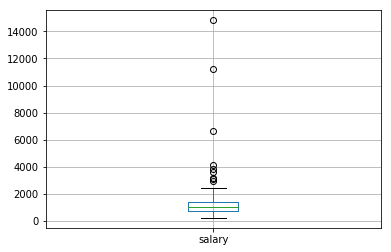

In [43]:
data.boxplot(column='salary', return_type='both')

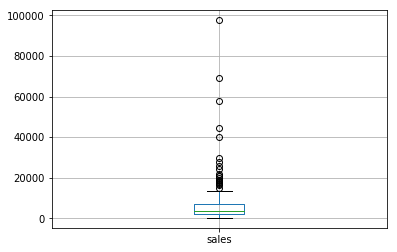

In [47]:
data.boxplot(column='sales', return_type='axes')

{'whiskers': [<matplotlib.lines.Line2D at 0x85d2f90>,
 'caps': [<matplotlib.lines.Line2D at 0x85da450>,
 'boxes': [<matplotlib.lines.Line2D at 0x85d2ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x85dab90>],
 'fliers': [<matplotlib.lines.Line2D at 0x85dabf0>],
 'means': []}

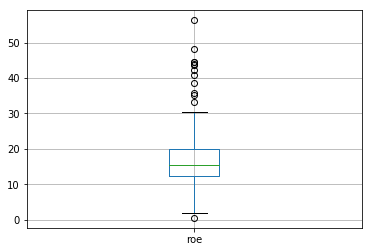

In [48]:
data.boxplot(column='roe', return_type='dict')

## 3-1. salary 변수 이상치 처리

In [49]:
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary
IQR_salary

671.0

In [50]:
data_IQR = data[(data['salary']<Q3_salary+IQR_salary*1.5)& (data['salary']>Q1_salary-IQR_salary*1.5)] 

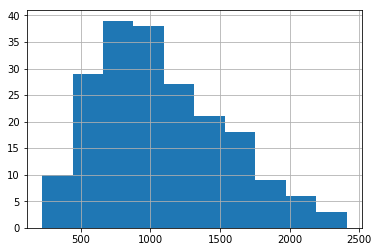

In [51]:
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

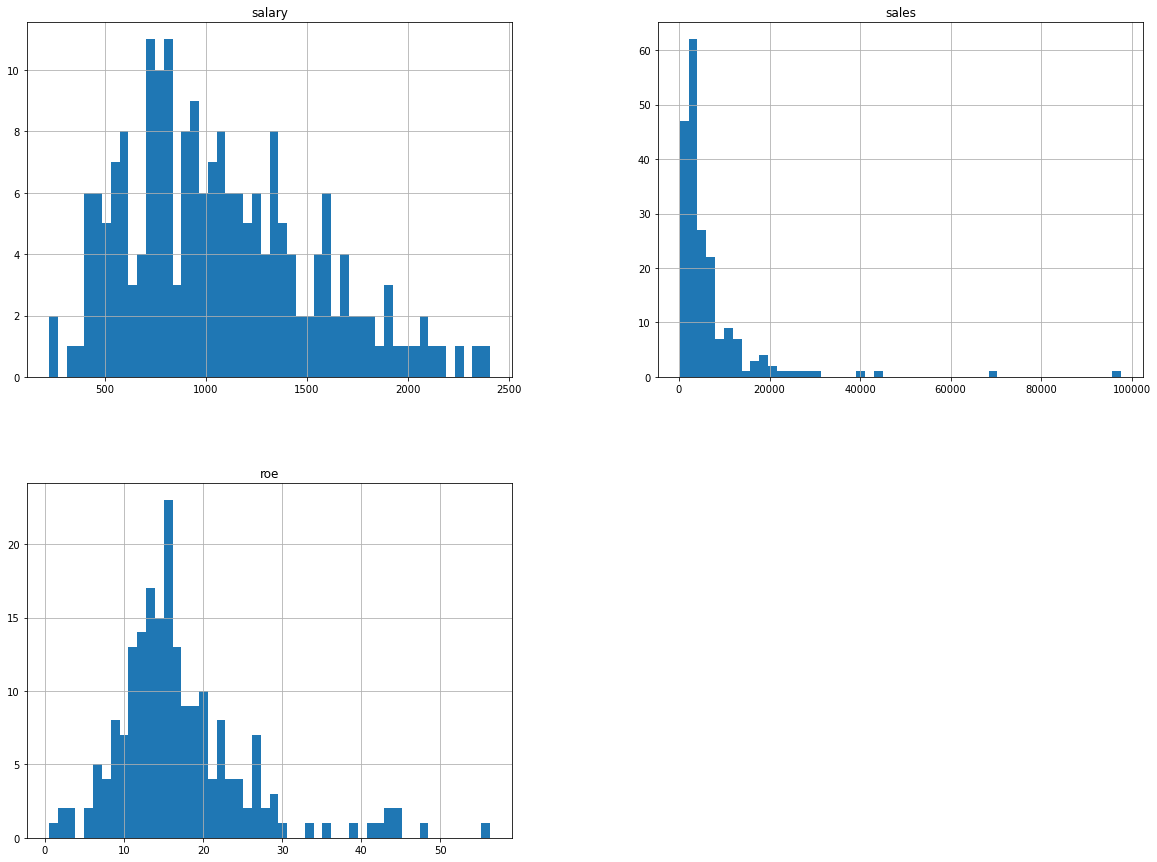

In [28]:
data_IQR.hist(bins=50, figsize=(20,15))

In [29]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.335446,0.289704
sales,0.335446,1.000000,-0.065034
roe,0.289704,-0.065034,1.000000


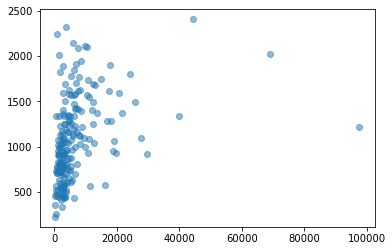

In [30]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['sales'], data_IQR['salary'], alpha=0.5)
plt.show()

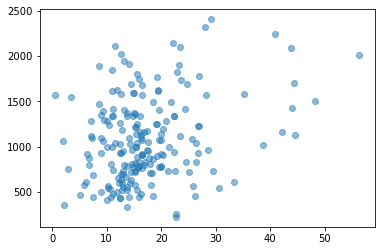

In [31]:
plt.scatter(data_IQR['roe'], data_IQR['salary'], alpha=0.5)
plt.show()

## 3-2. sales 변수 이상치 처리

In [32]:
Q1_sales = data['sales'].quantile(q=0.25)
Q3_sales = data['sales'].quantile(q=0.75)
IQR_sales = Q3_sales-Q1_sales
IQR_sales

4966.6999511718695

In [33]:
data_IQR=data[(data['sales']<Q3_sales+IQR_sales*1.5)& (data['sales']>Q1_sales-IQR_sales*1.5) &
              (data['salary']<Q3_salary+IQR_salary*1.5)& (data['salary']>Q1_salary-IQR_salary*1.5)]

<AxesSubplot:>

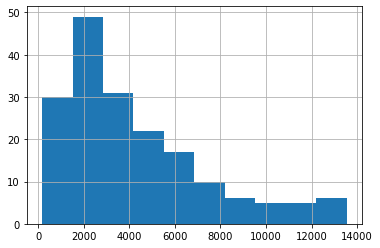

In [34]:
data_IQR['sales'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

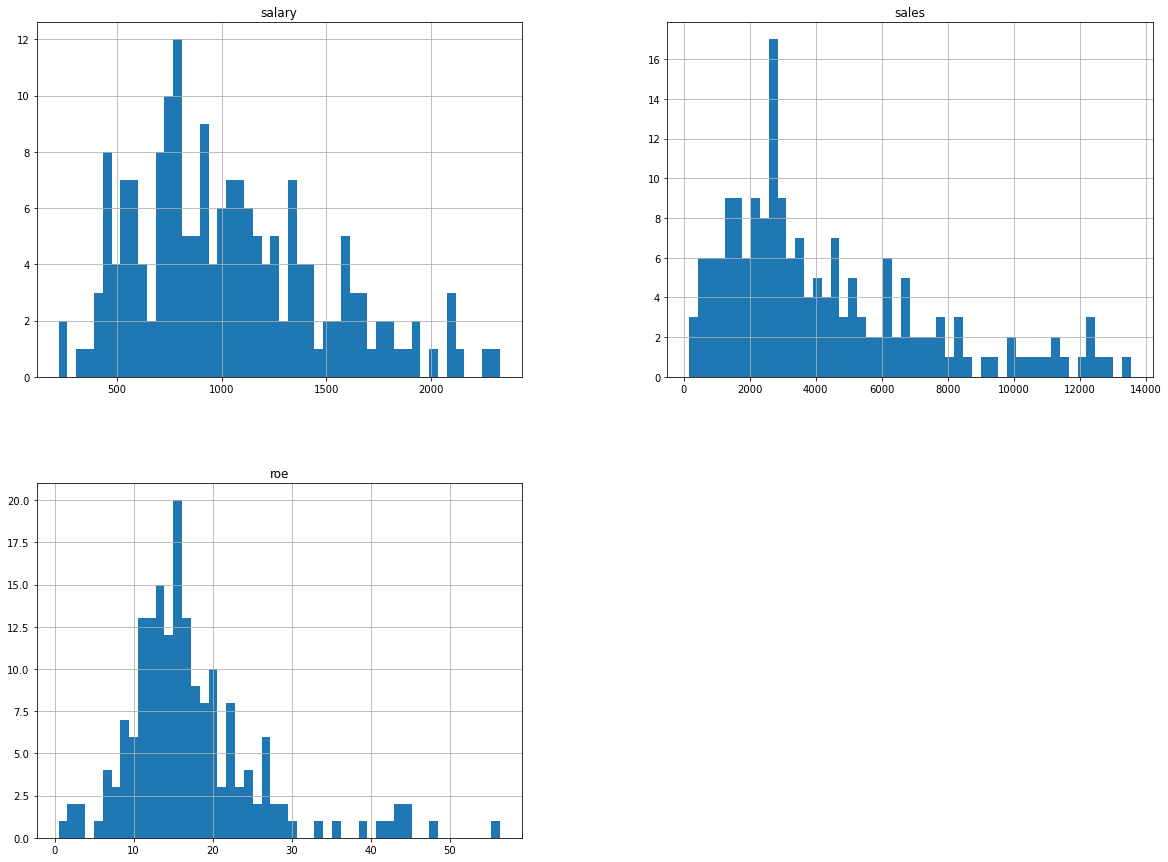

In [35]:
data_IQR.hist(bins=50, figsize=(20,15))

In [36]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000
